# OpenCV
- used for image processing
- used in detection and recognition

JPG - Joint Photographic Experts Group <br>
PNG - Portable Network Graphics

In [1]:
!pip install opencv-python

In [2]:
import cv2

In [3]:
image = cv2.imread("ai2.jpg")

In [4]:
image

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [12,  1,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [11,  1,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [10,  1,  0]]], dtype=uint8)

In [5]:
image.shape
#(rows , cols , dim)

(900, 1600, 3)

In [6]:
image[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [7]:
image[0][0]

array([0, 0, 0], dtype=uint8)

In [8]:
image[800][10]

array([1, 0, 0], dtype=uint8)

In [9]:
# visualizing the image

# cv2.imshow('Image' , image)
# cv2.waitKey(0)
# cv2.destroyAllWindows

In [10]:
from matplotlib import pyplot as plt

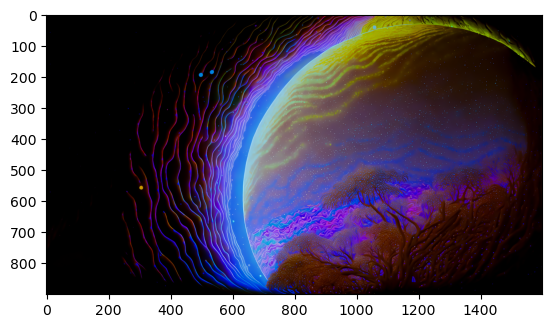

In [11]:
plt.imshow(image)

In [12]:
img_rbg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

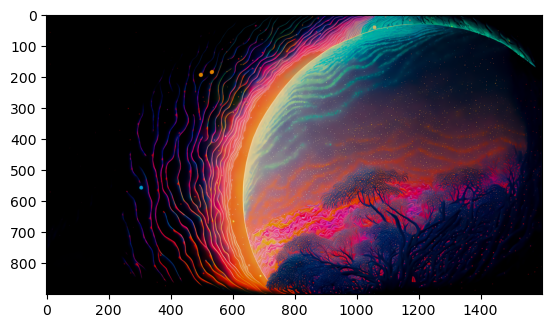

In [13]:
plt.imshow(img_rbg)

In [14]:
img_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

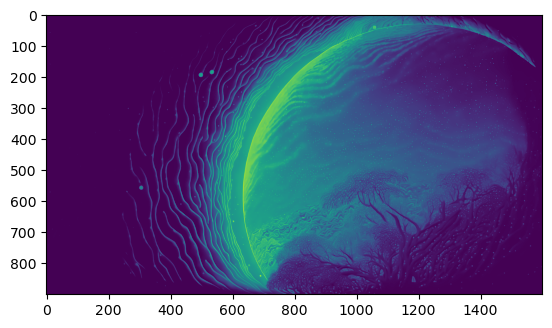

In [15]:
plt.imshow(img_grey)

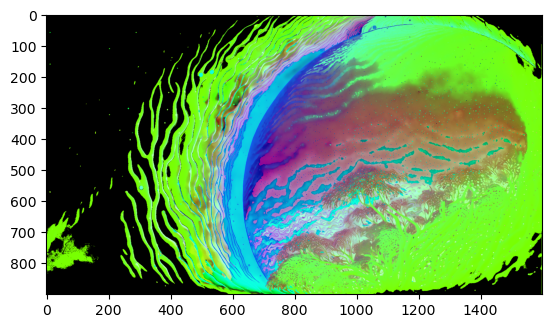

In [16]:
image_hsv = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)

# Image manipulation

# Changing brightness Brightness

In [17]:
image.shape

(900, 1600, 3)

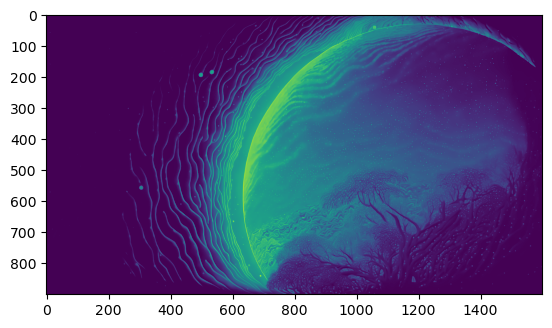

In [18]:
image_hsv = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
plt.imshow(img_grey)

In [19]:
hue , sat , val = cv2.split(image_hsv)

In [20]:
val

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0, 12],
       [ 0,  0,  0, ...,  0,  0, 11],
       [ 0,  0,  0, ...,  0,  0, 10]], dtype=uint8)

In [21]:
import numpy as np

add_val = 100       # to increase the brightness

add_val = -50       # to reduce the brightness

new_val = val.astype(np.int64) + add_val

In [22]:
new_val

array([[-50, -50, -50, ..., -50, -50, -50],
       [-50, -50, -50, ..., -50, -50, -50],
       [-50, -50, -50, ..., -50, -50, -50],
       ...,
       [-50, -50, -50, ..., -50, -50, -38],
       [-50, -50, -50, ..., -50, -50, -39],
       [-50, -50, -50, ..., -50, -50, -40]])

In [23]:
new_val[new_val>255] = 255
new_val[new_val < 0] = 0

In [24]:
new_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
new_val_uint = new_val.astype(np.uint8)
new_val_uint

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
image_new_hsv = cv2.merge([hue , sat , new_val_uint])

In [27]:
image_new_bgr = cv2.cvtColor(image_new_hsv , cv2.COLOR_HSV2BGR)
cv2.imshow('image' , image_hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

# as a function

In [28]:
def change_bright_bgr(image , add_val):

    image_hsv = cv2.cvtColor(image , cv2.COLOR_BGR2HSV)
    hue , sat , val = cv2.split(image_hsv)
    
    new_val = val.astype(np.int64) + add_val
    new_val[new_val>255] = 255
    new_val[new_val < 0] = 0
    
    new_val_uint = new_val.astype(np.uint8)
    image_new_hsv = cv2.merge([hue , sat , new_val_uint])
    image_new_bgr = cv2.cvtColor(image_new_hsv , cv2.COLOR_HSV2BGR)
    
    return image_new_bgr

In [29]:
cv2.imshow('image' , change_bright_bgr(image , -10))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Edge detection

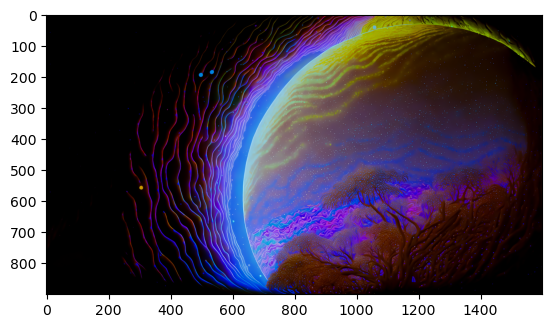

In [33]:
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
plt.imshow(image)

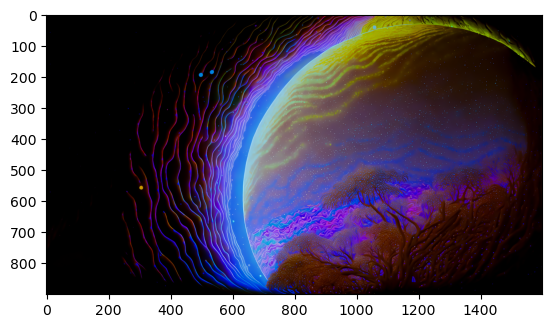

In [34]:
image_grey = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [35]:
cv2.imshow('image' , image_grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Sobel filter

In [45]:
sobel_x = cv2.Sobel(image_grey , ddepth = cv2.CV_64F , dx = 1 , dy = 0)
sobel_y = cv2.Sobel(image_grey , ddepth = cv2.CV_64F , dx = 0 , dy = 1)
sobel_xy = cv2.Sobel(image_grey , ddepth = cv2.CV_64F , dx = 1 , dy = 1)

In [40]:
cv2.imshow('image' , sobel_x)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
cv2.imshow('image' , sobel_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
cv2.imshow('image' , sobel_xy)
cv2.waitKey(0)
cv2.destroyAllWindows()